In [1]:
import pandas as pd
import quandl # dataset providing package, now iam using kaggle for downloading sample data
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
df = pd.read_csv('data_files/WIKI_PRICES.csv')
df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,31.041951,34.112034,27.289627,30.018590,44739900.0
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,29.295415,29.336350,27.160002,27.548879,10897100.0
2,A,1999-11-22,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,28.183363,30.018590,27.330562,30.018590,4705200.0
3,A,1999-11-23,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,28.995229,29.766161,27.460188,27.460188,4274400.0
4,A,1999-11-24,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,27.378319,28.613174,27.289627,28.012803,3464400.0


In [3]:
df = df[['adj_open','adj_high','adj_low','adj_close','adj_volume']]

In [4]:
# high low percentage
df['HL_PCT'] = (df['adj_high'] - df['adj_close']) / df['adj_close'] * 100.0

In [5]:
# percentage change new - old / old * 100.0
df['PCT_change'] = (df['adj_close'] - df['adj_open']) / df['adj_open'] * 100.0

In [6]:
df = df[['adj_close','HL_PCT','PCT_change','adj_volume']]

In [7]:
df.head()

,adj_close,HL_PCT,PCT_change,adj_volume
0,30.018590,13.636364,-3.296703,44739900.0
1,27.548879,6.488361,-5.961807,10897100.0
2,30.018590,0.000000,6.511740,4705200.0
3,27.460188,8.397516,-5.294118,4274400.0
4,28.012803,2.143205,2.317468,3464400.0


In [8]:
forecast_col = 'adj_close'

In [9]:
df.fillna(-99999, inplace=True)

In [11]:
forecast_out = int(math.ceil(0.1 * len(df))) # 10 percentage data
print(forecast_out)

1538932


In [12]:
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

In [13]:
df.head()

,adj_close,HL_PCT,PCT_change,adj_volume,label
0,30.018590,13.636364,-3.296703,44739900.0,27.130393
1,27.548879,6.488361,-5.961807,10897100.0,27.400187
2,30.018590,0.000000,6.511740,4705200.0,26.956626
3,27.460188,8.397516,-5.294118,4274400.0,23.380701
4,28.012803,2.143205,2.317468,3464400.0,22.553025


In [14]:
df.tail()

,adj_close,HL_PCT,PCT_change,adj_volume,label
13850377,14.640,0.717213,0.273973,456800.0,23.95
13850378,14.750,0.000000,0.067843,771200.0,23.35
13850379,14.975,2.003339,1.525424,873200.0,23.55
13850380,14.730,2.647658,-1.438608,488400.0,24.65
13850381,14.605,2.636084,-1.517195,427000.0,23.60


In [15]:
X = np.array(df.drop(columns=['label']))  # Features
y = np.array(df['label'])

X = preprocessing.scale(X)

In [16]:
# X = X[:-forcast_out+1]
df.dropna(inplace=True)
y = np.array(df['label'])

In [17]:
print(len(X), len(y))

13850382 13850382


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
clf = LinearRegression()

In [20]:
clf.fit(X_train, y_train)

LinearRegression()

In [21]:
accuracy = clf.score(X_test, y_test)

In [22]:
accuracy # less accuracy

0.0006125025994003774

In [24]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score

# 2. Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)  # Adjust n_splits as needed

rmse_scores = []
r2_scores = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 3. Feature Scaling (Important: Scale WITHIN each fold)
    scaler = preprocessing.StandardScaler() # Initialize the Scaler

    X_train = scaler.fit_transform(X_train) # Fit and transform training data
    X_test = scaler.transform(X_test) # Transform test data using the fitted scaler

In [25]:
clf.fit(X_train, y_train)

# 5. Prediction and Evaluation
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred) # Use r2_score for R-squared

rmse_scores.append(rmse)
r2_scores.append(r2)

print(f"Fold: {len(rmse_scores)}, RMSE: {rmse}, R-squared: {r2}")

# 6. Overall Performance
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

print(f"\nAverage RMSE: {avg_rmse}")
print(f"Average R-squared: {avg_r2}")

Fold: 1, RMSE: 9917.635840156727, R-squared: -0.0015622666822932008

Average RMSE: 9917.635840156727
Average R-squared: -0.0015622666822932008


In [26]:
# performing badly

In [31]:
df = df[['open', 'high', 'low', 'close', 'volume']]
df['HL_PCT'] = (df['high'] - df['low']) / df['low'] * 100.0
df['PCT_change'] = (df['close'] - df['open']) / df['open'] * 100.0

df = df[['close', 'HL_PCT', 'PCT_change', 'volume']]

forecast_col = 'close'
df.fillna(-9999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], axis=1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

/tmp/ipykernel_10991/3260954031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HL_PCT'] = (df['high'] - df['low']) / df['low'] * 100.0


In [33]:
print(accuracy) # performing badly

2.925321332503117e-06


# Linear Regression from coursera course

In [3]:
import numpy as np
import matplotlib.pyplot as plt


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.

In [4]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [5]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


In [6]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0). 

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [7]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


### plotting the data

You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

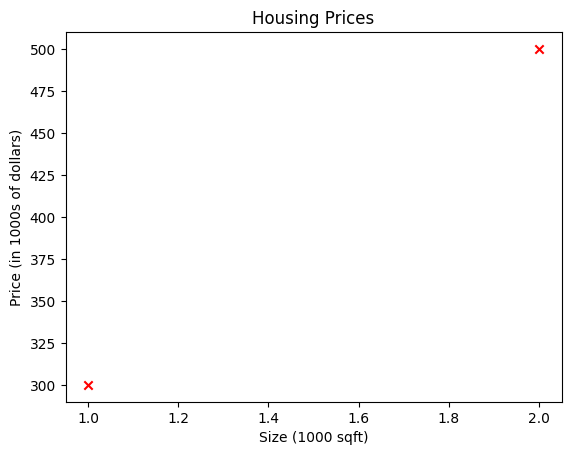

In [8]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

### model function

As described in lecture, the model function for linear regression (which is a function that maps from x to y) is represented as

𝑓𝑤,𝑏(𝑥(𝑖))=𝑤𝑥(𝑖)+𝑏(1)

The formula above is how you can represent straight lines - different values of  𝑤
  and  𝑏
  give you different straight lines on the plot.





Let's try to get a better intuition for this through the code blocks below. Let's start with  𝑤=100
  and  𝑏=100
 .

Note: You can come back to this cell to adjust the model's w and b parameters

In [17]:
w = 200
b = 100

Now, let's compute the value of  𝑓𝑤,𝑏(𝑥(𝑖))
  for your two data points. You can explicitly write this out for each data point as -

for  𝑥(0)
 , f_wb = w * x[0] + b

for  𝑥(1)
 , f_wb = w * x[1] + b

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a for loop as shown in the compute_model_output function below.

Note: The argument description (ndarray (m,)) describes a Numpy n-dimensional array of shape (m,). (scalar) describes an argument without dimensions, just a magnitude.
Note: np.zero(n) will return a one-dimensional numpy array with  𝑛
  entries

In [18]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Now let's call the compute_model_output function and plot the output..

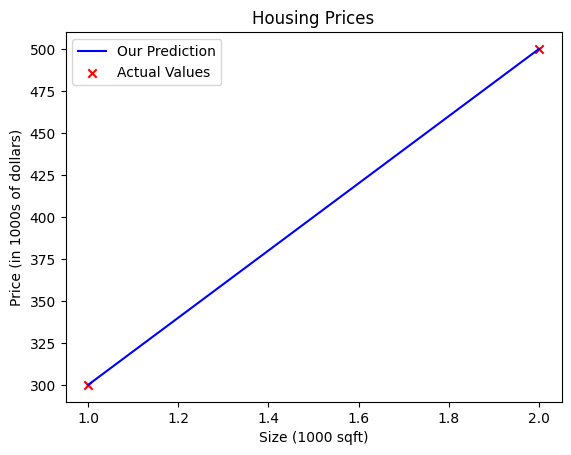

In [19]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

As you can see, setting  𝑤=100
  and  𝑏=100
  does not result in a line that fits our data.

Challenge
Try experimenting with different values of  𝑤
  and  𝑏
 . What should the values be for a line that fits our data?

Tip:
You can use your mouse to click on the green "Hints" below to reveal some hints for choosing b and w.

Hints
Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of 𝑥
 are in 1000's of sqft, 𝑥
 is 1.2.

In [20]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


Congratulations!
In this lab you have learned:

Linear regression builds a model which establishes a relationship between features and targets
In the example above, the feature was house size and the target was house price
for simple linear regression, the model has two parameters  𝑤
  and  𝑏
  whose values are 'fit' using training data.
once a model's parameters have been determined, the model can be used to make predictions on novel data.

### Above is an example for univariate linear regression

# Gradient Descent

### automate the process of optimizing  𝑤 and  𝑏 using gradient descent.

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

# Problem Statement

Let's use the same two data points as before - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |


In [5]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

### Compute_Cost
This was developed in the last lab. We'll need it again here.

In [6]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [7]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [9]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [10]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


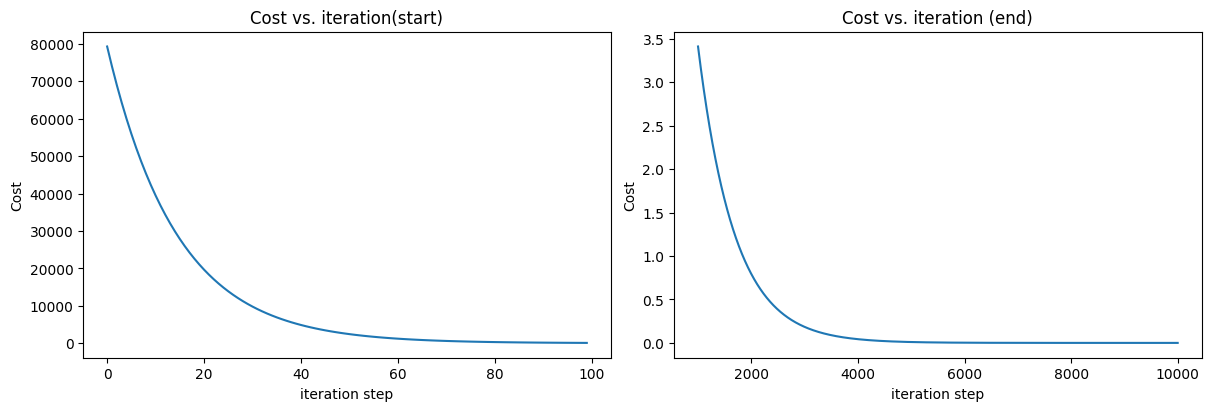

In [11]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

### Predictions
Now that you have discovered the optimal values for the parameters $w$ and $b$, you can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [12]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


# Linear Regression using sklearn (for tip dataset from the book - 01_Machine-Learning-for-Absolute-Beginners.pdf

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [17]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: >

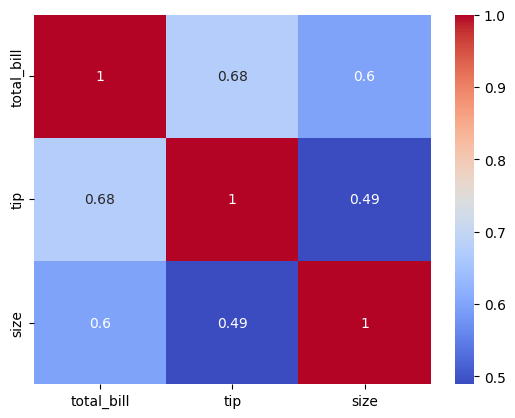

In [5]:
# Exploratory data analysis : correlation and heatmap
df1 = df.drop(['sex', 'smoker','day','time'], axis=1)
df1_corr = df1.corr()
sns.heatmap(df1_corr,annot=True,cmap='coolwarm')

In [ ]:
# closer the correlation to 1.0 or -1.0 its highly corelated, and 0.1 is low correlated
# the thing we need to check if dependent variable (here tip, that we need to predict) is correlated to independent values (here total_bill and size)
# it's correlated, so we need to add during making model
# now we need to check if independent variable themselves have high level of correlation
# in this case its a negative thing we dont need it, because it will like the jet mileage, where remaining space in fuel tank and fuel in tank are highly correlated independent variables
# multi-collinear variables are liters of fuel consumed and liters of fuel in the tank to predict how far a jet plane will fly. Both independent variables are directly correlated, and in this case negatively
# correlated; as one variables increases, the other variable decreases and vice versa. When both variables are used to predict the dependent variable of
# how far the jet will fly, one effectively cancels the other out. It’s still worthwhile to include one of these variables in the model, but it would be redundant to include both variables.

# we need avoid multi-collinearity
# To avoid multi-collinearity, we need to check the relationship between each
# combination of independent variables using a scatterplot, pairplot (a matrix
# of relationships between variables), or correlation score. (here its less than 0.9 so its okay)

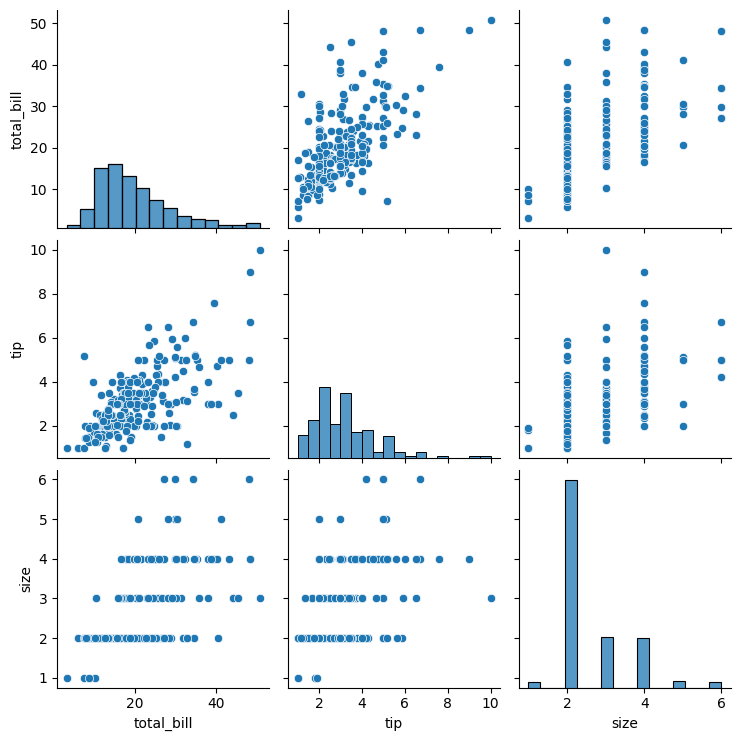

In [9]:
# Exploratory data analysis: pairplot
sns.pairplot(df)

In [13]:
# Convert non-numeric data using one-hot encoding
df = pd.get_dummies(df, columns=['time', 'day','sex','smoker'])
df_corr = df.corr()
df_corr

,total_bill,tip,size,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur,sex_Female,sex_Male,smoker_No,smoker_Yes
total_bill,1.000000,0.675734,0.598315,0.183118,-0.183118,-0.086168,0.054919,0.122953,-0.138174,-0.144877,0.144877,-0.085721,0.085721
tip,0.675734,1.000000,0.489299,0.121629,-0.121629,-0.055463,-0.002790,0.125114,-0.095879,-0.088862,0.088862,-0.005929,0.005929
size,0.598315,0.489299,1.000000,0.103411,-0.103411,-0.142184,-0.041121,0.193054,-0.072598,-0.086195,0.086195,0.133178,-0.133178
time_Dinner,0.183118,0.121629,0.103411,1.000000,-1.000000,-0.058159,0.462709,0.418071,-0.917996,-0.205231,0.205231,-0.054921,0.054921
time_Lunch,-0.183118,-0.121629,-0.103411,-1.000000,1.000000,0.058159,-0.462709,-0.418071,0.917996,0.205231,-0.205231,0.054921,-0.054921
day_Fri,-0.086168,-0.055463,-0.142184,-0.058159,0.058159,1.000000,-0.216319,-0.195451,-0.169608,0.071060,-0.071060,-0.244316,0.244316
day_Sat,0.054919,-0.002790,-0.041121,0.462709,-0.462709,-0.216319,1.000000,-0.500682,-0.434480,-0.053957,0.053957,-0.155744,0.155744
day_Sun,0.122953,0.125114,0.193054,0.418071,-0.418071,-0.195451,-0.500682,1.000000,-0.392566,-0.168106,0.168106,0.181624,-0.181624
day_Thur,-0.138174,-0.095879,-0.072598,-0.917996,0.917996,-0.169608,-0.434480,-0.392566,1.000000,0.194445,-0.194445,0.128534,-0.128534
sex_Female,-0.144877,-0.088862,-0.086195,-0.205231,0.205231,0.071060,-0.053957,-0.168106,0.194445,1.000000,-1.000000,0.002816,-0.002816


In [14]:
# 1,first we need to check if dependent variable (tip here) is how much correlated to independent variable
# for that look the column 2 (tips's column) - the author is taking out smoker because its so less than 0.1 0r -0.1
# there is no correlation between tip and smoker character
# 2, now we have to look independent variable correlation, here total_bill and size is not highly correlated if its values is like 0.98 its a red flag, here its 0.598315
# the day_thur variable and time_dinner , time_lunch variable are correlated at a high level but the author is not removing it, its remove it
# if we remove day_thur then we have to also remove day variable itself

In [25]:
# Assign X and y variables
X = df.drop(['tip','smoker','day'],axis=1)
X = pd.get_dummies(X, columns=['time','sex'])
y = df['tip']

In [26]:
X.head()

,total_bill,size,time_Dinner,time_Lunch,sex_Female,sex_Male
0,16.99,2,True,False,True,False
1,10.34,3,True,False,False,True
2,21.01,3,True,False,False,True
3,23.68,2,True,False,False,True
4,24.59,4,True,False,True,False


In [27]:
# split data into test/train set (70/30 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,shuffle=True)

In [28]:
# Assign algorithm
model = LinearRegression()

In [29]:
# Link algorithm to X and y variables
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Find y-intercept
model.intercept_

0.8178354261199066

In [31]:
# Find X coefficients
model.coef_

array([ 0.09634585,  0.1117113 , -0.03460713,  0.03460713, -0.03950796,
        0.03950796])

In [38]:
mean_absolute_error__train_val = mean_absolute_error(y_train, model.predict(X_train))

In [41]:
print(f"Training set Mean Absolute Error : {mean_absolute_error__train_val:.2f}")

Training set Mean Absolute Error : 0.76


In [42]:
mean_absolute_error__test_val = mean_absolute_error(y_test, model.predict(X_test))

In [43]:
print(f"Test set Mean Absolute Error : {mean_absolute_error__test_val:.2f}")

Test set Mean Absolute Error : 0.72


In [44]:
jamie = [
    30, # total_bill
    2, # size
    True, # time_dinner
    False, # time_lunch
    False, # sex_femal
    True, # sex_male
]

In [45]:
# Make prediction
jamie = model.predict([jamie])

/home/thiyophin/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
jamie

array([3.93653445])

In [47]:
# 3.9 almost 4 dollar, the author got 4.1 almose 4 as well